# Geometric Transform, Skewed Text

## Import resources and display image

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

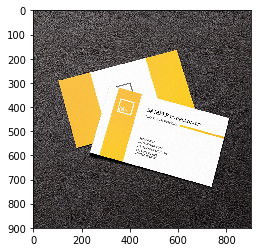

In [9]:
%matplotlib inline

image = cv2.imread('images/s.jpg')
image_copy = np.copy(image)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

plt.imshow(image_copy)

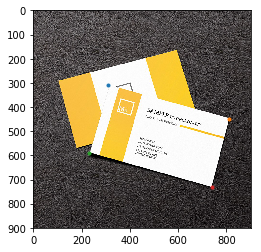

In [18]:
%matplotlib inline

plt.imshow(image_copy)

plt.plot(310, 310, '.')
plt.plot(810, 450, '.')
plt.plot(230, 590, '.')
plt.plot(740, 730, '.')

## Define the geometric transform

In [44]:
def warp(image):
    # Four source coordinates, which define a rec plane
    source_pts = np.float32([[310, 310], 
     [810, 450],    
     [740, 730],
    [230, 590]])
    
    # Order Matter
    warped_pts = np.float32(
        [
        [100, 200],
        [100, 500],
        [800, 550],
        
        [800, 200],
        ]
    )
    
    #Compute the perspective transform, M (matrics)
    M = cv2.getPerspectiveTransform(source_pts, warped_pts) # perspective matrix
    
    #Compute the inverse transform
    M_inv = cv2.getPerspectiveTransform(warped_pts, source_pts) # just reverse the param
    
    # Get the image size (width, height)
    image_size = (image.shape[1], image.shape[0])
    
    warped = cv2.warpPerspective(image, M, image_size, flags=cv2.INTER_LINEAR)
    
    return warped

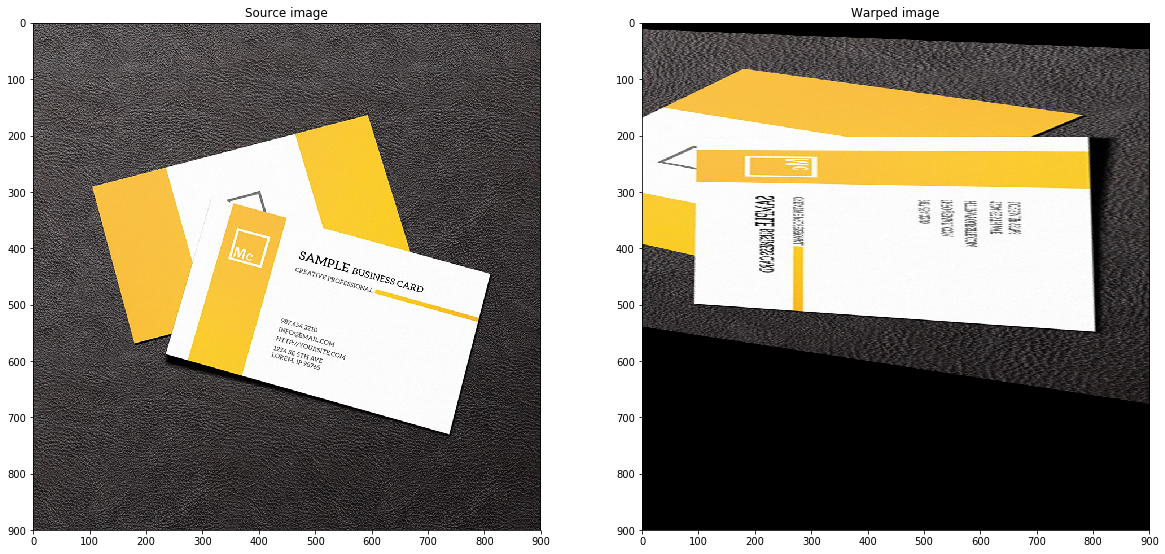

In [45]:
warped_image = warp(image_copy)

# Create side-by-side plots
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

ax1.set_title('Source image')
ax1.imshow(image_copy)
ax2.set_title('Warped image')
ax2.imshow(warped_image)